In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error


In [97]:
import pandas as pd

df = pd.read_csv("D:/capstone project/zip/youtube_shorts_tiktok_trends_2025.csv")
df

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,Night Routine — College,NextVision,trending,8bit loop,...,External,1,2e681528d17a1fe1986857942536ec27,30317,0.086159,0.004004,120.069,0.086159,0.012555,0.007830
1,TikTok,Se,Europe,sv,Food,#Sports,Morning Routine — College,DailyVlogsDiego,trending,Street vibe,...,Search,0,2e35fa0b2978b9cae635839c1d4e9e74,30577,0.085298,0.002421,113.005,0.085298,0.007850,0.007791
2,TikTok,Za,Africa,en,Art,#Workout,Night Routine — College,BeyondHub,licensed,Gallery pad,...,External,1,0d88a011235a82244995ef52961f9502,503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146
3,TikTok,Kr,Asia,ko,News,#Esports,Best Settings for Fortnite,NextHub,original,Neutral piano,...,Search,1,e15cff7621ed3f9eb9d2c97c841be0f3,7828,0.086257,0.003164,108.156,0.086257,0.011205,0.005292
4,TikTok,Au,Oceania,en,Beauty,#Comedy,When your friend is Beginners,LucasOfficial,licensed,Soft glam loop,...,ForYou,1,d696b4f0a50ea70e7cb5021be7e198ec,1171,0.051441,0.001175,72.400,0.051441,0.004204,0.004142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48074,YouTube,Ke,Africa,sw,Lifestyle,#Motivation,Weekly Reset — Beginners,NoahChannel,licensed,Chill guitar,...,Search,0,a756bd218ad29bce51bad0fac806a857,2904,0.025804,0.001247,33.216,0.025804,0.003454,0.002059
48075,YouTube,Sa,Asia,ar,Art,#DanceChallenge,Weekly Reset — Beginners,MrYuki,trending,Gallery pad,...,Home,1,0aeb762f68a9867eaf0b937006933021,2461,0.040411,0.005011,49.725,0.040411,0.003213,0.003617
48076,YouTube,Kr,Asia,ko,Science,#Comedy,When your friend is 2025,LifeOfAyaka,original,Lab beeps,...,Suggested,1,78ebd3268e18a3033895739c44680d82,1415,0.033513,0.003593,43.827,0.033513,0.004027,0.004119
48077,YouTube,Br,South America,pt,Pets,#OOTD,GRWM: Beginners Edition,TechieNoah,trending,Cute whistle,...,Home,1,67fd2032ade8be89da4c0208fbc05596,2457,0.043857,0.003594,59.272,0.043857,0.006465,0.003088


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   platform                 48079 non-null  object 
 1   country                  48079 non-null  object 
 2   region                   48079 non-null  object 
 3   language                 48079 non-null  object 
 4   category                 48079 non-null  object 
 5   hashtag                  48079 non-null  object 
 6   title_keywords           48079 non-null  object 
 7   author_handle            48079 non-null  object 
 8   sound_type               48079 non-null  object 
 9   music_track              48079 non-null  object 
 10  week_of_year             48079 non-null  int64  
 11  duration_sec             48079 non-null  int64  
 12  views                    48079 non-null  int64  
 13  likes                    48079 non-null  int64  
 14  comments              

In [99]:
df.isnull().sum()

platform                   0
country                    0
region                     0
language                   0
category                   0
hashtag                    0
title_keywords             0
author_handle              0
sound_type                 0
music_track                0
week_of_year               0
duration_sec               0
views                      0
likes                      0
comments                   0
shares                     0
saves                      0
engagement_rate            0
trend_label                0
source_hint                0
notes                      0
device_type                0
upload_hour                0
genre                      0
trend_duration_days        0
trend_type                 0
engagement_velocity        0
dislikes                   0
comment_ratio              0
share_rate                 0
save_rate                  0
like_dislike_ratio         0
publish_dayofweek          0
publish_period             0
event_season  

In [100]:
df.describe()

,week_of_year,duration_sec,views,likes,comments,shares,saves,engagement_rate,upload_hour,trend_duration_days,...,avg_watch_time_sec,completion_rate,is_weekend,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
count,48079.000000,48079.000000,4.807900e+04,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,...,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000
mean,18.234260,34.489320,9.929276e+04,5737.732108,628.657314,553.484494,591.071487,0.075415,15.986751,13.742923,...,21.662460,0.635308,0.622995,7510.945402,0.057607,0.002462,75.415322,0.057607,0.006310,0.005556
std,9.996924,16.401608,1.318522e+05,8639.923653,967.782704,849.436172,978.280616,0.030091,5.489399,13.343582,...,10.583019,0.112604,0.484641,11262.284575,0.023123,0.001586,30.090519,0.023123,0.002969,0.002496
min,1.000000,5.000000,7.940000e+02,33.000000,3.000000,3.000000,2.000000,0.014720,0.000000,3.000000,...,2.800000,0.400000,0.000000,43.000000,0.011792,0.000000,14.720000,0.011792,0.000975,0.000735
25%,10.000000,22.000000,3.032250e+04,1526.000000,160.000000,143.000000,138.000000,0.052326,13.000000,5.000000,...,14.000000,0.548000,0.000000,1998.000000,0.039941,0.001273,52.326000,0.039941,0.004058,0.003670
50%,18.000000,31.000000,5.962000e+04,3167.000000,339.000000,301.000000,301.000000,0.071575,17.000000,7.000000,...,19.400000,0.635000,1.000000,4159.000000,0.054654,0.002138,71.575000,0.054654,0.005809,0.005163
75%,27.000000,43.000000,1.180945e+05,6618.000000,720.000000,635.000000,659.500000,0.094794,20.000000,17.000000,...,27.000000,0.724000,1.000000,8675.000000,0.072280,0.003276,94.793500,0.072281,0.008016,0.007000
max,35.000000,90.000000,3.080686e+06,310916.000000,31776.000000,29004.000000,29679.000000,0.235819,23.000000,60.000000,...,67.300000,0.850000,1.000000,390142.000000,0.185300,0.012718,235.819000,0.185300,0.023668,0.020328


In [101]:
q3=np.quantile(df["completion_rate"],0.75)
q3

np.float64(0.724)

In [8]:
q1=np.quantile(df["completion_rate"],0.25)
q1

np.float64(0.548)

In [9]:
lw=q1-1.5*(q3-q1)
uw=q3+1.5*(q3+q1)
print(lw,uw)

0.28400000000000014 2.6319999999999997


In [10]:
df=df.loc[(df["completion_rate"]>=lw) & (df["completion_rate"]<=uw)]
df

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,Night Routine — College,NextVision,trending,8bit loop,...,External,1,2e681528d17a1fe1986857942536ec27,30317,0.086159,0.004004,120.069,0.086159,0.012555,0.007830
1,TikTok,Se,Europe,sv,Food,#Sports,Morning Routine — College,DailyVlogsDiego,trending,Street vibe,...,Search,0,2e35fa0b2978b9cae635839c1d4e9e74,30577,0.085298,0.002421,113.005,0.085298,0.007850,0.007791
2,TikTok,Za,Africa,en,Art,#Workout,Night Routine — College,BeyondHub,licensed,Gallery pad,...,External,1,0d88a011235a82244995ef52961f9502,503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146
3,TikTok,Kr,Asia,ko,News,#Esports,Best Settings for Fortnite,NextHub,original,Neutral piano,...,Search,1,e15cff7621ed3f9eb9d2c97c841be0f3,7828,0.086257,0.003164,108.156,0.086257,0.011205,0.005292
4,TikTok,Au,Oceania,en,Beauty,#Comedy,When your friend is Beginners,LucasOfficial,licensed,Soft glam loop,...,ForYou,1,d696b4f0a50ea70e7cb5021be7e198ec,1171,0.051441,0.001175,72.400,0.051441,0.004204,0.004142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48074,YouTube,Ke,Africa,sw,Lifestyle,#Motivation,Weekly Reset — Beginners,NoahChannel,licensed,Chill guitar,...,Search,0,a756bd218ad29bce51bad0fac806a857,2904,0.025804,0.001247,33.216,0.025804,0.003454,0.002059
48075,YouTube,Sa,Asia,ar,Art,#DanceChallenge,Weekly Reset — Beginners,MrYuki,trending,Gallery pad,...,Home,1,0aeb762f68a9867eaf0b937006933021,2461,0.040411,0.005011,49.725,0.040411,0.003213,0.003617
48076,YouTube,Kr,Asia,ko,Science,#Comedy,When your friend is 2025,LifeOfAyaka,original,Lab beeps,...,Suggested,1,78ebd3268e18a3033895739c44680d82,1415,0.033513,0.003593,43.827,0.033513,0.004027,0.004119
48077,YouTube,Br,South America,pt,Pets,#OOTD,GRWM: Beginners Edition,TechieNoah,trending,Cute whistle,...,Home,1,67fd2032ade8be89da4c0208fbc05596,2457,0.043857,0.003594,59.272,0.043857,0.006465,0.003088


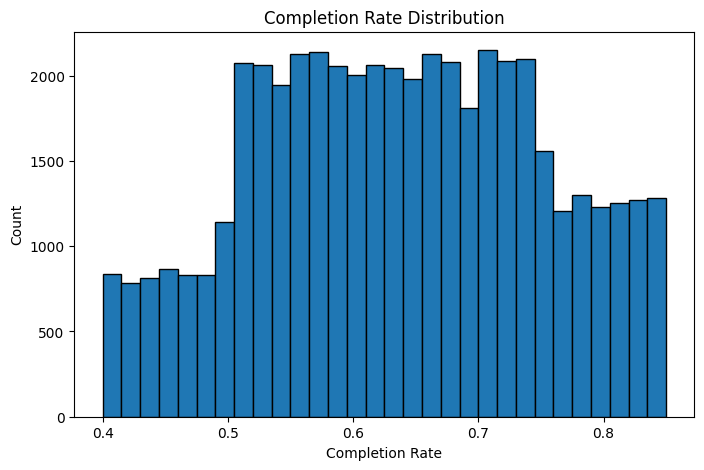

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.hist(df['completion_rate'], bins=30, edgecolor="black")

plt.title("Completion Rate Distribution")
plt.xlabel("Completion Rate")
plt.ylabel("Count")

plt.show()


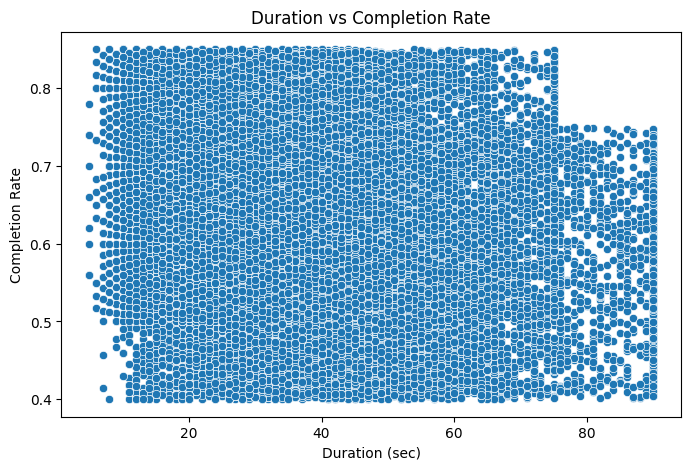

In [103]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="duration_sec", y="completion_rate")
plt.title("Duration vs Completion Rate")
plt.xlabel("Duration (sec)")
plt.ylabel("Completion Rate")
plt.show()


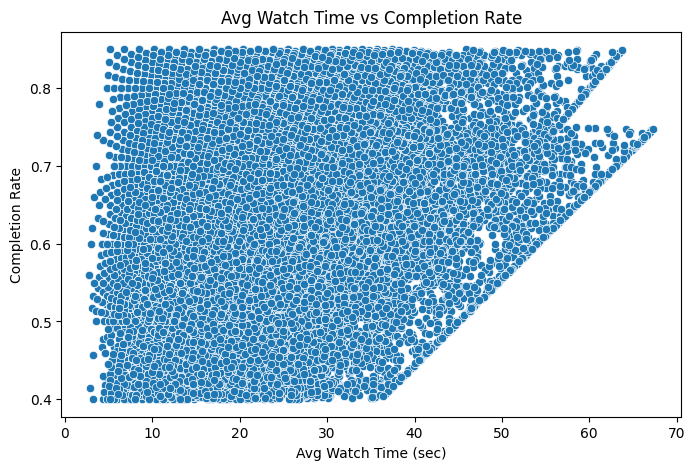

In [104]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="avg_watch_time_sec", y="completion_rate")
plt.title("Avg Watch Time vs Completion Rate")
plt.xlabel("Avg Watch Time (sec)")
plt.ylabel("Completion Rate")
plt.show()


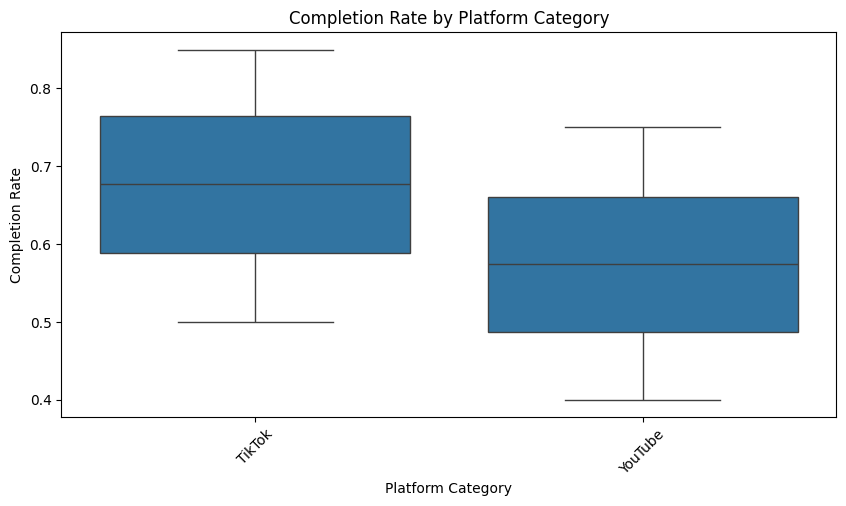

In [105]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="platform", y="completion_rate")
plt.title("Completion Rate by Platform Category")
plt.xlabel("Platform Category")
plt.ylabel("Completion Rate")
plt.xticks(rotation=45)
plt.show()


In [106]:
df.columns

Index(['platform', 'country', 'region', 'language', 'category', 'hashtag',
       'title_keywords', 'author_handle', 'sound_type', 'music_track',
       'week_of_year', 'duration_sec', 'views', 'likes', 'comments', 'shares',
       'saves', 'engagement_rate', 'trend_label', 'source_hint', 'notes',
       'device_type', 'upload_hour', 'genre', 'trend_duration_days',
       'trend_type', 'engagement_velocity', 'dislikes', 'comment_ratio',
       'share_rate', 'save_rate', 'like_dislike_ratio', 'publish_dayofweek',
       'publish_period', 'event_season', 'tags', 'sample_comments',
       'creator_avg_views', 'creator_tier', 'season', 'publish_date_approx',
       'year_month', 'title', 'title_length', 'has_emoji',
       'avg_watch_time_sec', 'completion_rate', 'device_brand',
       'traffic_source', 'is_weekend', 'row_id', 'engagement_total',
       'like_rate', 'dislike_rate', 'engagement_per_1k',
       'engagement_like_rate', 'engagement_comment_rate',
       'engagement_share_rate'

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd

# -----------------------------
# Define target + features
# -----------------------------
target = "completion_rate"

features = [
    "duration_sec",
    "avg_watch_time_sec",
    "platform",
    "category",
    "event_season",
    "traffic_source"
]

X = df[features]
y = df[target]

# -----------------------------
# Identify numeric + categorical columns
# -----------------------------
num_cols = ["duration_sec", "avg_watch_time_sec"]
cat_cols = ["platform", "category", "event_season", "traffic_source"]

# -----------------------------
# Preprocessing pipeline
# -----------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# -----------------------------
# Full model pipeline
# -----------------------------
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Fit model (no string errors now)
# -----------------------------
pipe.fit(X_train, y_train)

# -----------------------------
# Predict
# -----------------------------
y_pred = pipe.predict(X_test)

print("Model training successful!")
print("Sample predictions:", y_pred[:5])


Model training successful!
Sample predictions: [0.65517249 0.46249167 0.59994439 0.52738991 0.52953463]


In [108]:
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))


R2 score 0.8287232070471621
MAE 0.03517289398833191
MSE 0.0021927148015384312
RMSE 0.04682643272275213


In [109]:
new_video = pd.DataFrame([{
    "duration_sec": 40,
    "avg_watch_time_sec": 25.8,
    "platform": "TikTok",
    "category": "Running",
    "event_season": "Holiday",
    "traffic_source": "Hashtag"
}])

prediction = pipe.predict(new_video)
print("Predicted completion rate:", prediction[0])


Predicted completion rate: 0.6592369992221111


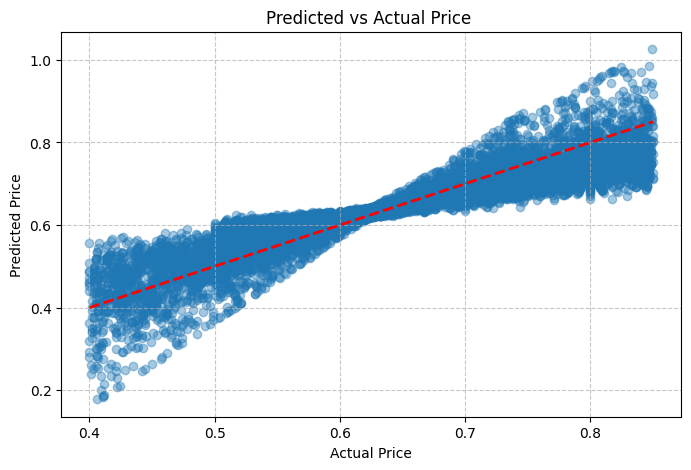

In [110]:
# -- Plot Predicted vs Actual 

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,alpha=0.4,label="Predicted vs Actual")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2,label="Perfect Prediction")
plt.title("Predicted vs Actual Price ")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True,linestyle="--",alpha=0.7)
plt.show()

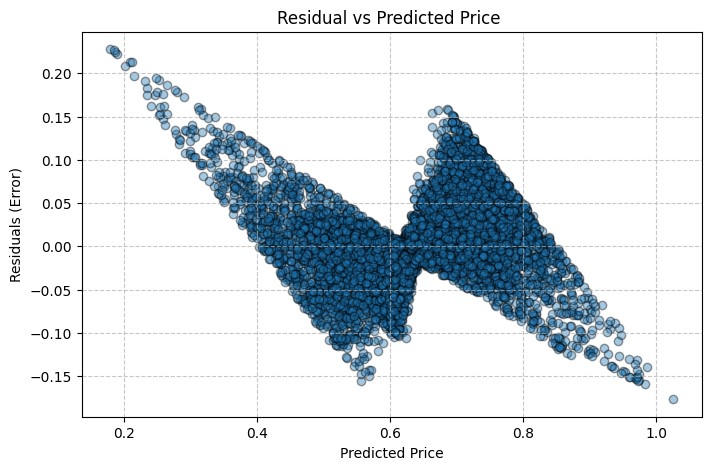

In [111]:
# -- Residual Plot

import matplotlib.pyplot as plt
import seaborn as sns

residual=y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred,residual,alpha=0.4,edgecolors="k")
plt.title("Residual vs Predicted Price ")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Error)")
plt.grid(True,linestyle="--",alpha=0.7)
plt.show()

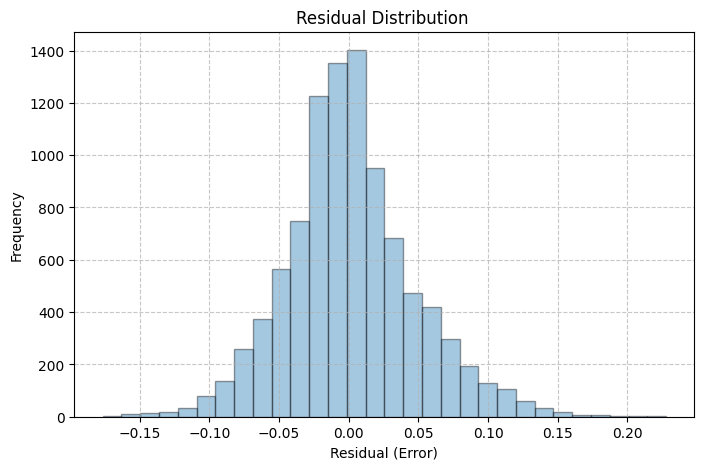

In [112]:
# -- Residual Histogram

import matplotlib.pyplot as plt
import seaborn as sns

residual=y_test - y_pred
plt.figure(figsize=(8,5))
plt.hist(residual,bins=30,alpha=0.4,edgecolor="black")
plt.title("Residual Distribution ")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.grid(True,linestyle="--",alpha=0.7)
plt.show()